# HANDWRITTEN DIGIT RECOGNITION

### Importing Libraries required

In [13]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

### Data reading and Cleaning

In [14]:
# Reading File
df=pd.read_csv('train.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [16]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [17]:
df.shape

(42000, 785)

### Checking for null values

In [18]:
df.isnull().values.any()

False

### Checking for duplicate rows

In [19]:
df[df.duplicated()==True]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


#### There are no null values and duplicate rows

In [20]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

##### All digits have similar number of records.

## Plotting digits to make sure that data given is good
#### Group the data set on labels to get mean values and plot data

In [21]:
df_mean=df.groupby('label').mean()
df_mean=df_mean.reset_index()
df_mean.shape

(10, 785)

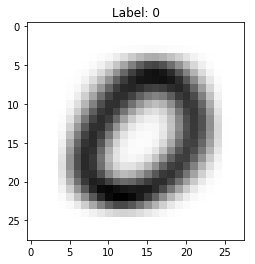

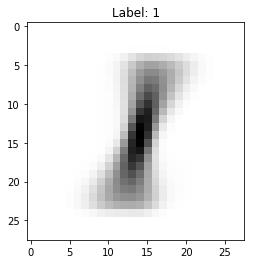

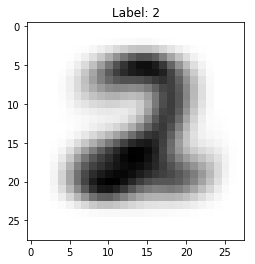

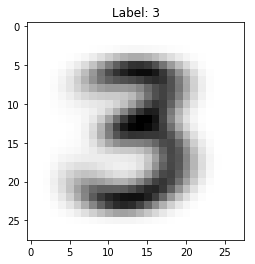

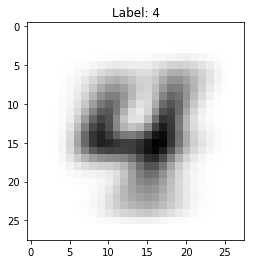

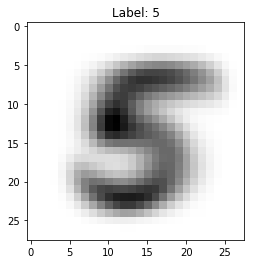

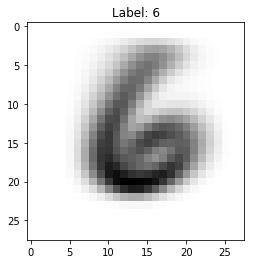

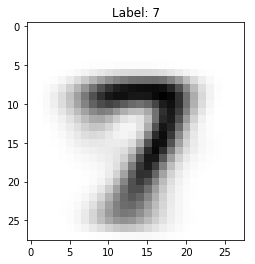

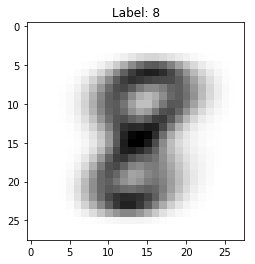

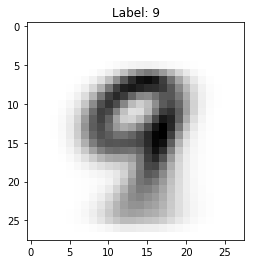

In [22]:
for i in range(0,10):
    img = df_mean.drop('label',axis=1).loc[i,:]
    lbl = df_mean['label'][i]

    # image size (28*28)
    plt_img = np.reshape(img.values, (28, 28))

    # Plot the image
    plt.imshow(plt_img, cmap='gray_r')
    plt.title('Label: {}'.format(lbl))
    plt.show()

##### All the 10  digits look good in above plot which represents data given is good. There are no null values and datset does not need any cleaning

## Preparing data for Model Building

In [23]:
X=df.drop('label',axis=1)

In [24]:
y=df['label']

### Scaling pixel data

In [25]:
X_scaled=scale(X)

## Splitting train dataset into 20% for testing and 80% for testing

In [26]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2, test_size=0.8,  random_state = 101)

In [27]:
len(X_train)

8400

### Linear model building using SVC

In [28]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred_lin = model_linear.predict(X_test)

In [29]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_lin), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_lin))

accuracy: 0.913125 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]]


### Accuracy of 91% is obtained from linear model.
### Lets build non linear model (rbf kernel) and check for accuracy

In [30]:
# non-linear model

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [31]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9396428571428571 

[[3195    0   19    5    4   11   32    4   14    1]
 [   0 3689   23   12    8    3    7    6    8    4]
 [  15   15 3144   29   31    5   18   37   43    6]
 [   5    8   92 3191    5   73    6   31   43   21]
 [   3    7   57    1 3099    9   19   21    7   67]
 [  15   10   37   66   16 2776   53   15   32   19]
 [  19    5   46    1   12   31 3149    2   12    0]
 [   6   21   66   11   25    3    0 3285    3   84]
 [  14   24   40   63   14   62   22   19 2996   18]
 [  12   10   38   40   80    6    0   97   24 3048]]


### Accuracy of around 94% is obtained by non linear model

### Regulating the model complexity using hyper parameters

In [32]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)         

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 79.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

### Results of model build via K fold cross validation with hyperparameters

In [33]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,88.685859,4.756229,11.084593,0.461070,1,0.01,"{'C': 1, 'gamma': 0.01}",0.752381,0.750595,0.747024,...,0.741310,0.010784,12,1.000000,0.999851,0.999851,1.000000,1.000000,0.999940,0.000073
1,22.464022,0.688359,6.566224,0.427614,1,0.001,"{'C': 1, 'gamma': 0.001}",0.935119,0.926786,0.935119,...,0.930833,0.004216,4,0.972321,0.971429,0.971429,0.972173,0.973214,0.972113,0.000663
2,30.894947,1.031103,8.252336,0.161011,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.910119,0.905952,0.907738,...,0.903095,0.006075,8,0.916518,0.917708,0.916518,0.921577,0.919940,0.918452,0.002001
3,92.506968,3.052192,11.164585,0.347969,10,0.01,"{'C': 10, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,19.474951,0.289846,5.897188,0.108574,10,0.001,"{'C': 10, 'gamma': 0.001}",0.941071,0.938690,0.945833,...,0.939405,0.003865,1,0.999405,0.999554,0.999405,0.999107,0.999256,0.999345,0.000152
5,14.203230,0.588965,5.189137,0.132582,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.933929,0.923214,0.931548,...,0.927262,0.004678,5,0.957887,0.959970,0.959375,0.957738,0.959077,0.958810,0.000865
6,88.043833,0.710706,10.609252,0.057865,100,0.01,"{'C': 100, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,17.984663,0.408405,5.533204,0.091830,100,0.001,"{'C': 100, 'gamma': 0.001}",0.939881,0.936905,0.946429,...,0.939286,0.003783,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,10.579741,0.319006,4.208140,0.098248,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.929762,0.923810,0.925595,...,0.925595,0.003409,6,0.994345,0.994494,0.994940,0.993006,0.994196,0.994196,0.000645
9,89.239129,2.157885,10.777173,0.207109,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.766071,0.772619,0.765476,...,0.760476,0.009705,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


### Plotting C vs Accuracy for each gamma 

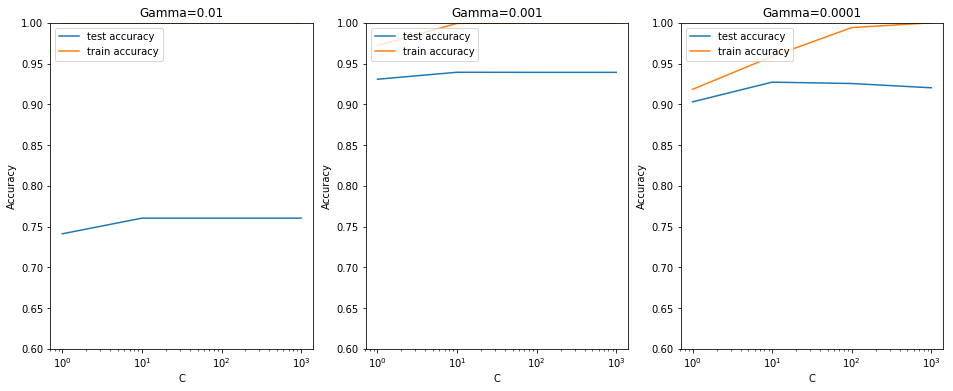

In [34]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

### Calculating optimal value of C and Gamma

In [35]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9394047619047619 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Build model with C=10 and Gamma=0.001

In [36]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9477083333333334 

[[3211    0   19    2    2   12   26    3    8    2]
 [   0 3692   26    9    6    3    5    9    7    3]
 [  13   12 3165   29   29    6   20   40   21    8]
 [   4    5   77 3232    4   79    1   23   31   19]
 [   5    8   42    1 3117    5   20   19    9   64]
 [  15    8   33   61   15 2815   35   11   31   15]
 [  19    5   44    1   12   18 3167    1   10    0]
 [   5   17   52   12   29    4    1 3322    4   58]
 [   7   16   42   53   15   51   18   16 3044   10]
 [   9    9   33   20   81   10    0   94   21 3078]] 



### Accuracy obtained is around 95%(94.77) using rbf kenel with C=10 and gamma =0.001

In [37]:
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      3285
          1       0.98      0.98      0.98      3760
          2       0.90      0.95      0.92      3343
          3       0.95      0.93      0.94      3475
          4       0.94      0.95      0.94      3290
          5       0.94      0.93      0.93      3039
          6       0.96      0.97      0.96      3277
          7       0.94      0.95      0.94      3504
          8       0.96      0.93      0.94      3272
          9       0.95      0.92      0.93      3355

avg / total       0.95      0.95      0.95     33600



### Calculating class wise accuracy using confusion matrix

In [38]:
matrix = metrics.confusion_matrix(y_test, y_pred)

In [39]:
matrix

array([[3211,    0,   19,    2,    2,   12,   26,    3,    8,    2],
       [   0, 3692,   26,    9,    6,    3,    5,    9,    7,    3],
       [  13,   12, 3165,   29,   29,    6,   20,   40,   21,    8],
       [   4,    5,   77, 3232,    4,   79,    1,   23,   31,   19],
       [   5,    8,   42,    1, 3117,    5,   20,   19,    9,   64],
       [  15,    8,   33,   61,   15, 2815,   35,   11,   31,   15],
       [  19,    5,   44,    1,   12,   18, 3167,    1,   10,    0],
       [   5,   17,   52,   12,   29,    4,    1, 3322,    4,   58],
       [   7,   16,   42,   53,   15,   51,   18,   16, 3044,   10],
       [   9,    9,   33,   20,   81,   10,    0,   94,   21, 3078]],
      dtype=int64)

### Digits predicted correctly

In [40]:
matrix.diagonal()

array([3211, 3692, 3165, 3232, 3117, 2815, 3167, 3322, 3044, 3078],
      dtype=int64)

### Total predictions for each digit

In [41]:
matrix.sum(axis=1)

array([3285, 3760, 3343, 3475, 3290, 3039, 3277, 3504, 3272, 3355],
      dtype=int64)

### Calculating Accuracy, Accuracy = Correct predictions/ Total predictions

In [42]:
classwise_Accuracy = matrix.diagonal()/matrix.sum(axis=1)
classwise_Accuracy

array([0.97747336, 0.98191489, 0.94675441, 0.93007194, 0.94741641,
       0.92629154, 0.96643271, 0.94805936, 0.93031785, 0.91743666])

In [43]:
for i in range(len(classwise_Accuracy)):
    print('Precesion of Class ' + str(i) + " : " + str(classwise_Accuracy[i] * 100))

Precesion of Class 0 : 97.74733637747336
Precesion of Class 1 : 98.19148936170212
Precesion of Class 2 : 94.67544122046067
Precesion of Class 3 : 93.00719424460432
Precesion of Class 4 : 94.74164133738601
Precesion of Class 5 : 92.62915432708128
Precesion of Class 6 : 96.64327128471163
Precesion of Class 7 : 94.80593607305936
Precesion of Class 8 : 93.03178484107579
Precesion of Class 9 : 91.74366616989568


### Each class has accuracy of above 90% and is good

### Total Accuracy of about 95% and class wise accuracy of 90% can be obtained with non linear SVM model with rbf kernel with hyper parameters of C=10 and gamma of 0.001